# QBio REU Intermediate Python

## Week 3 Solutions: Numpy Random, Indexing, and Matplotlib Histograms

### Exercise 1

- Load the attached file `week3_data.csv.` 
- Compute the mean and standard deviation of the data.
- Make a histogram of the data. Then on the same axes, plot a normal distribution with the mean and standard deviation that you calculated. Do you think the mean and standard deviation do a good job describing this dataset?
- You should find that the single normal distribution does not do a great job describing the data because there are really two underlying clusters. Using boolean indexing, split the dataset into two subsets that roughly separates out the two clusters. (There are algorithmic ways of doing this but thats not the point here, just eyeball it. I'm happy to talk about clustering/classification algorithms in office hours if you're interested)
- Compute the mean and standard deviation of each subset separately. 
- Then make a plot showing the data as a histogram where the subsets are colored differently. Overlay two normal distributions computed using the mean and standard deviation of each subset. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc("font", family = "serif") #Serif font in matplotlib
mpl.rc("figure",figsize=(9,6)) #Increase default figure size
%config InlineBackend.figure_format = 'retina' #If you have a high res display, render the plots more nicely
mpl.style.use('dark_background') #Use a dark background for matplotlib figures if youre using dark theme
plt.rcParams.update({"figure.facecolor": "111111",
                     "savefig.facecolor": "212121"})

In [7]:
def normal_dist(x, mean, std):
    return (1./np.sqrt(2*np.pi*std**2))*np.exp(-(x-mean)**2/(2*std**2))

In [8]:
data = np.loadtxt('week3_data.csv', delimiter=',')

In [9]:
data.shape

(1200,)

In [4]:
x = np.linspace(data.min()-3,data.max()+3,200)

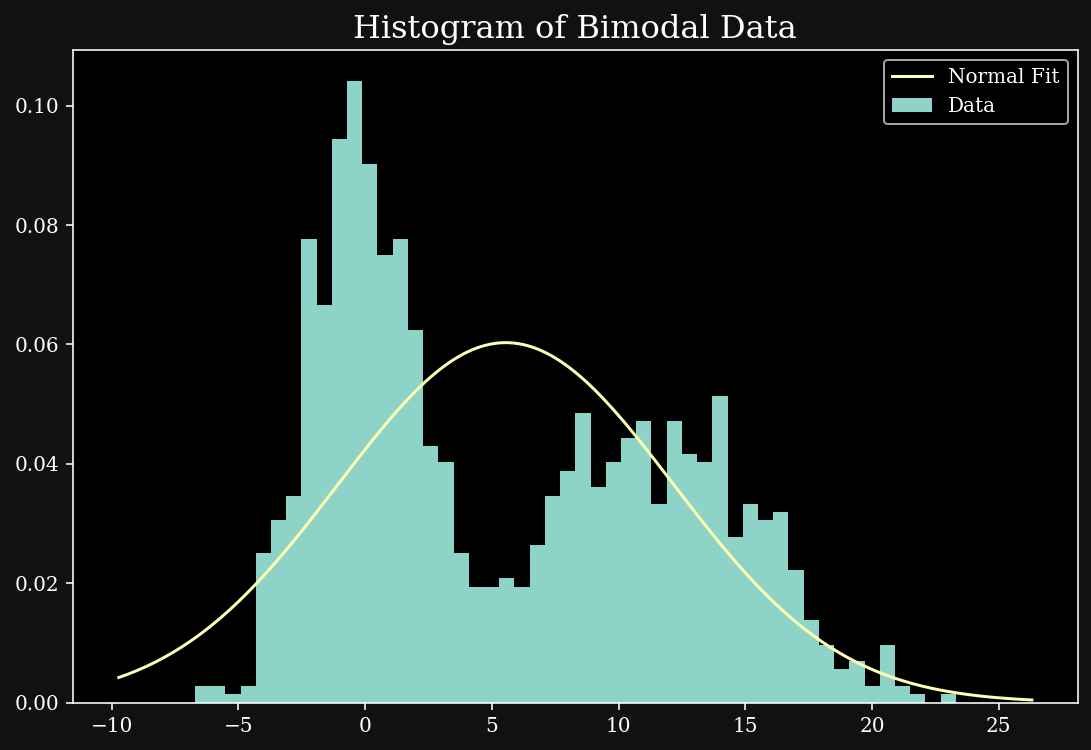

In [12]:
plt.hist(data, bins=50, density=True, label='Data') #density=True normalizes the counts such that the integral is 1
plt.plot(x,normal_dist(x, data.mean(), data.std()), label="Normal Fit")
plt.legend()
plt.title("Histogram of Bimodal Data", fontsize=16)
plt.show()

In [14]:
cutoff = 5

In [15]:
data<cutoff

array([False, False, False, ..., False, False,  True])

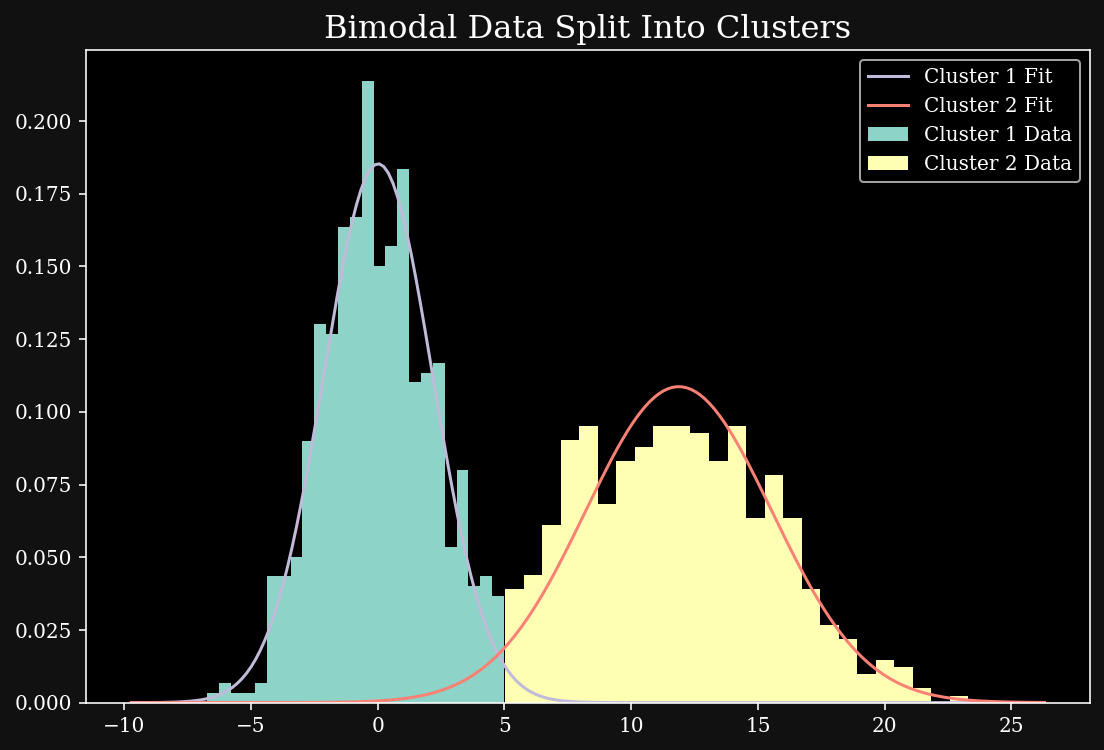

In [43]:
plt.hist(data[data<cutoff],bins=25, density=True, label="Cluster 1 Data")
plt.hist(data[data>=cutoff],bins=25, density=True, label="Cluster 2 Data")
plt.plot(x, normal_dist(x,data[data<cutoff].mean(), data[data<cutoff].std()), label="Cluster 1 Fit")
plt.plot(x, normal_dist(x,data[data>=cutoff].mean(), data[data>=cutoff].std()), label="Cluster 2 Fit")
plt.title("Bimodal Data Split Into Clusters", fontsize=16)
plt.legend()
plt.show()

### Exercise 2

- Simulate 100 trajectories of 1000 steps each for a 1D biased random walk where each walker takes a step to the right (+1) with probability 0.65 and a step to the left (-1) with probability 0.35. *Hint* you can use `np.random.choice`. Check out the keyword argument `p` or read the documentation.
- Make a histogram of the walkers positions at times 100, 500, and 1000.
- Compute the mean and standard deviation of the walkers' positions as a function of time and plot them. Can you come up with a formula for the mean as a function of time in terms of $p_{R}$ and $p_L$ the probabilities of going right and left? Check your formula by plotting it along with your computed mean as a function of time.




In [18]:
N_walkers = 100
N_steps = 1000
pR = 0.65
pL = 1- pR

In [19]:
steps = np.random.choice([-1,1], size=(N_walkers, N_steps), p=[pL, pR])

In [20]:
steps.shape

(100, 1000)

In [22]:
walks = np.cumsum(steps, axis=-1)

In [23]:
walks.shape

(100, 1000)

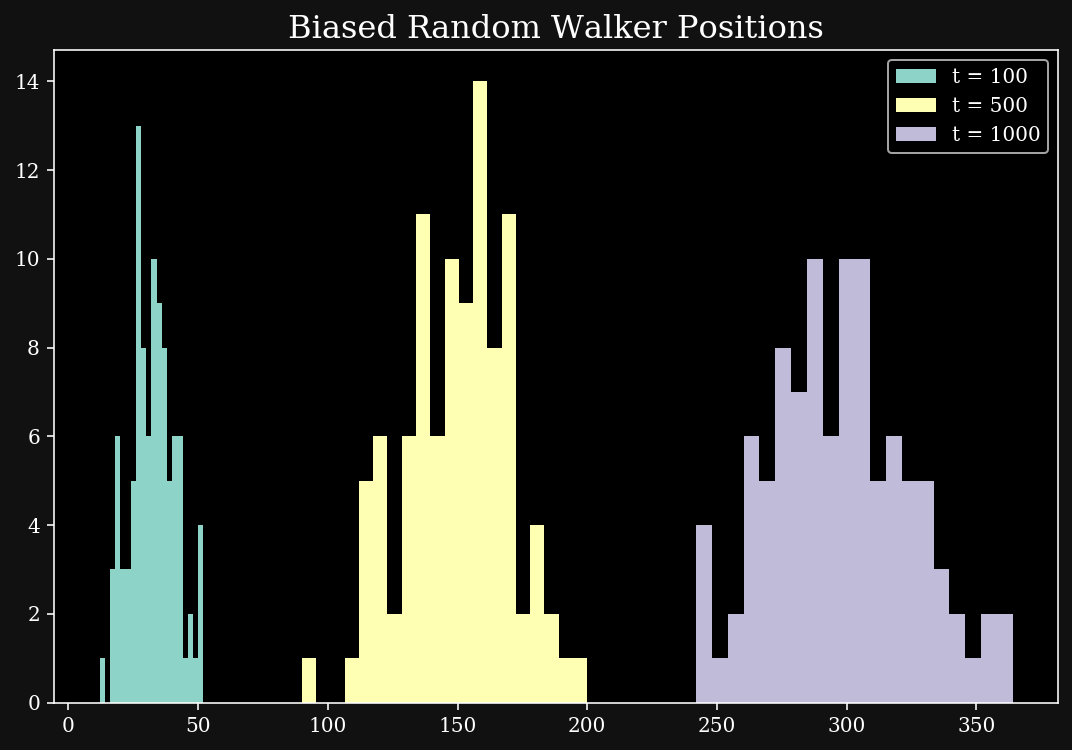

In [34]:
for t in [100,500,1000]:
    plt.hist(walks[:, t-1], bins=20, label=f"t = {t}")
plt.title("Biased Random Walker Positions", fontsize=16)
plt.legend()
plt.show()

### A little bit of mathematical thinking:

We can think of the set of random walkers each taking a step to the left with probability $p_L$ and to the right with $p_R$. Then at each time step, on average a fraction $p_R$ will move to the right and $p_L$ will move to the left. The average position of the population will then change by $p_R* (+1) + p_L*(-1) = p_R-p_L$. That is the change per time step so over time the average position will be $(p_R - p_L)*t$.

The standard deviation still grows like $\sqrt{t}$ as was the case for the random walk with equal probabilities. So as the plot above shows, the population drifts to the right and spreads out as it moves.

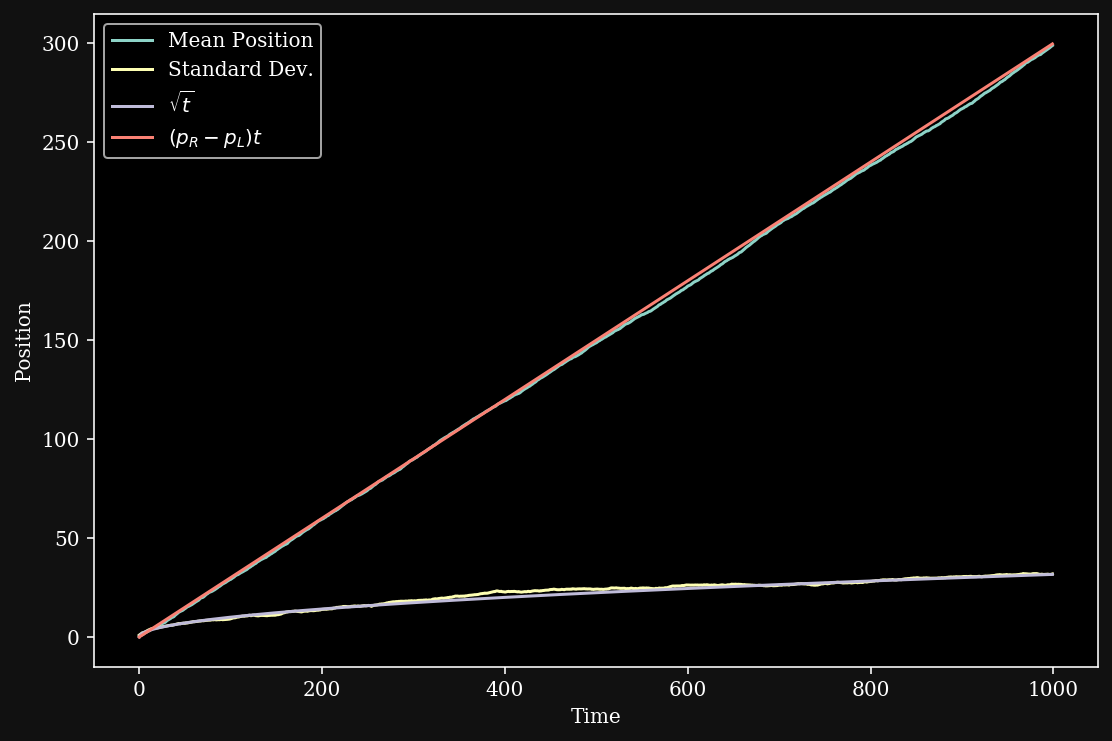

In [26]:
plt.plot(walks.mean(0), label="Mean Position")
plt.plot(walks.std(0), label="Standard Dev.")
plt.plot(np.sqrt(np.arange(1000)), label="$\sqrt{t}$")
plt.plot((pR - pL)*np.arange(1000), label="$(p_R - p_L)t$")
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.show()